In [1]:
from fears.population import Population
from fears.experiment import Experiment
import numpy as np
import matplotlib.pyplot as plt
import pickle
from fears.utils import stats, plotter

# k_abs = [0.005,0.007,0.009,0.011]

# for k in k_abs:
#     p = Population(death_model = 'pharmacodynamic',n_sims=1,max_dose=10**2,n_timestep=500,dwell=True,dwell_time=24*4,k_abs=k,k_elim=0)
#     p.simulate()
np.random.seed(2024)

init_counts = np.zeros(16)
init_counts[0] = 10**5

options = {
    'mut_rate':10**-9,
    'fitness_data':'from_file',
    'use_carrying_cap':True,
    'carrying_cap':10**8,
    'dwell':True,
    'dwell_time':24*4,
    'death_model':'pharmacodynamic',
    'k_elim':0,
    'n_timestep':500,
    'plot':False,
    'k_abs':0.95,
    'k_elim':0.00839,
    'max_dose':20,
    'regimen_length':14*24,
}

eq_times = [0,2*24,4*24,8*24]
n_sims = 100
debug=False

experiment_type = 'equilibrium-time'

e = Experiment(experiment_type=experiment_type,
                n_sims=n_sims,
                eq_times=eq_times,
                population_options = options,
                results_folder='results',
                debug=debug)
# p = np.array([0.0])

In [2]:
e.run_experiment()

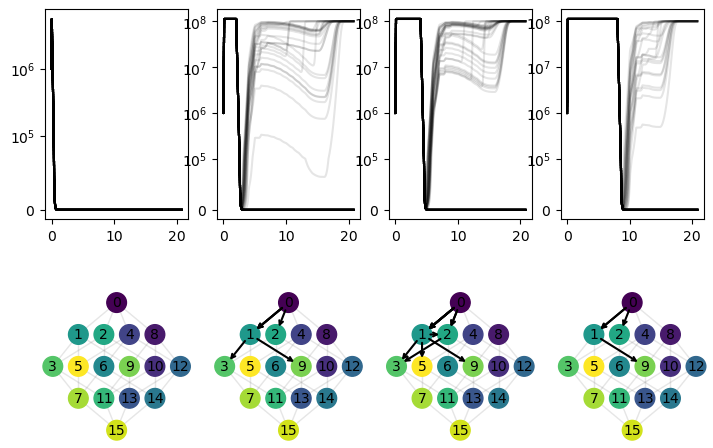

In [12]:
# exp = pickle.load(open(e.experiment_info_path,'rb'))
exp = pickle.load(open('./results/results_03052024_0006/experiment_info_03052024_0006.p','rb'))

p = exp.populations[0]

fig,ax_list = plt.subplots(ncols=4,nrows=2,figsize=(8.5,6))


km_data = stats.km_curve(exp=exp,resistance_outcome=[14,15])
prop_data1 = stats.n_mut_curve(exp=exp,nmut=1)
prop_data2 = stats.n_mut_curve(exp=exp,nmut=2)
prop_data3 = stats.n_mut_curve(exp=exp,nmut=3)

cmap = plt.get_cmap('Accent')

arrowprops = dict(arrowstyle='->', color='black', lw=1.5,mutation_scale=7,shrinkA=6,shrinkB=6)

landscape_options = {'node_size':200,
                    'square':True,'node_label':'base10','arrowprops':arrowprops,
                    'resize_param':0.01,'edge_alpha':0.1,'textsize':10}

for i in range(len(eq_times)):
    ax = ax_list[0,i]
    for sim_num in range(n_sims):
        
        y = stats.get_population_timetrace(sim_num=sim_num,condition_num=i,exp=exp)

        t = np.arange(len(y))/24

        ax.plot(t,y,color='black',alpha=0.1)
        
        ax.set_yscale('symlog',linthresh=10**5)

        # ax = ax_list[1,i]
    
    ax = ax_list[1,i]
    traj_list = []
    for sim_num in range(n_sims):
        
        data = stats.get_sim_data(sim_num=sim_num,condition_num=i,exp=exp)
        trajectory = [0]
        for t in range(len(data[:,0])):
            pop = data[t,:]
            max_gen = np.argmax(pop)
            if max_gen != trajectory[-1]:
                trajectory.append(max_gen)

        traj_list.append(trajectory)

    traj_list = list(set([tuple(traj) for traj in traj_list]))
    plotter.plot_landscape(p,trajectory_list=traj_list,conc=np.mean(p.drug_curve),ax=ax,
                           colorbar=False,**landscape_options)

# for i,key in enumerate(prop_data1.keys()):

#     ax = ax_list[2,i]

#     t = np.arange(len(prop_data1[key]))/24
#     ax.plot(t,prop_data1[key],label='1',linewidth=2,color=cmap(4))
#     t = np.arange(len(prop_data2[key]))/24
#     ax.plot(t,prop_data2[key],label='2',linewidth=2,color=cmap(5))
#     t = np.arange(len(prop_data2[key]))/24
#     ax.plot(t,prop_data3[key],label='3',linewidth=2,color=cmap(6))

#     ax.set_yscale('symlog',linthresh=10**-3)
#     ax.set_yticks([])
        


# fig.tight_layout()


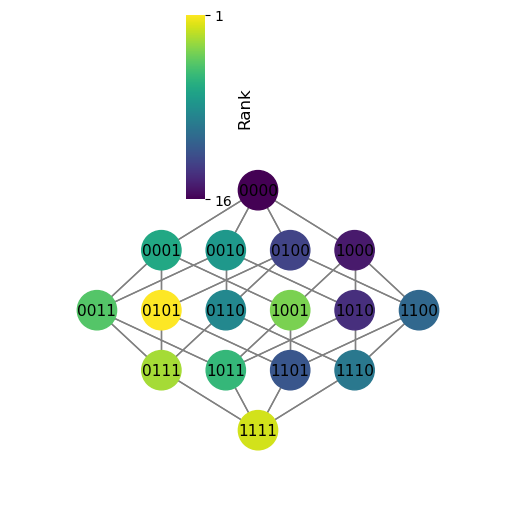

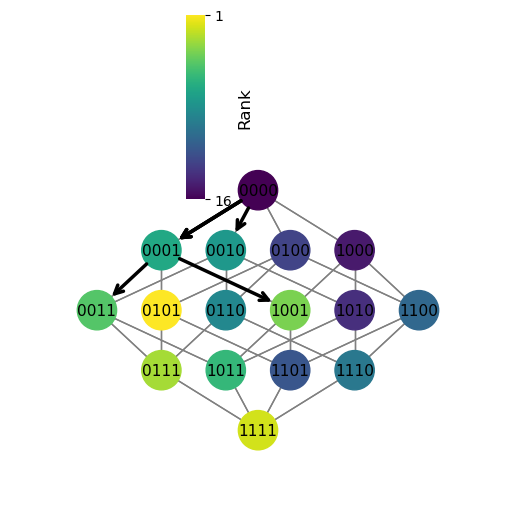

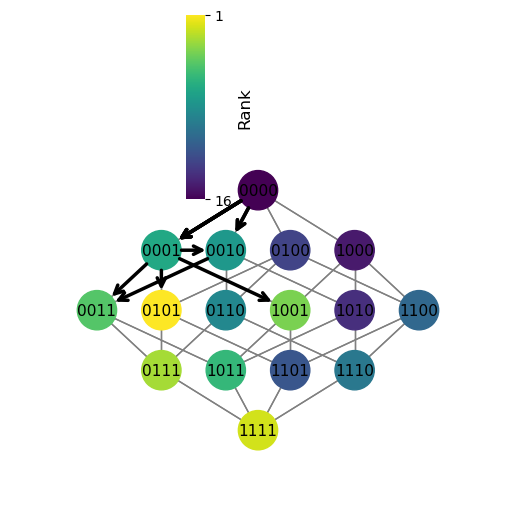

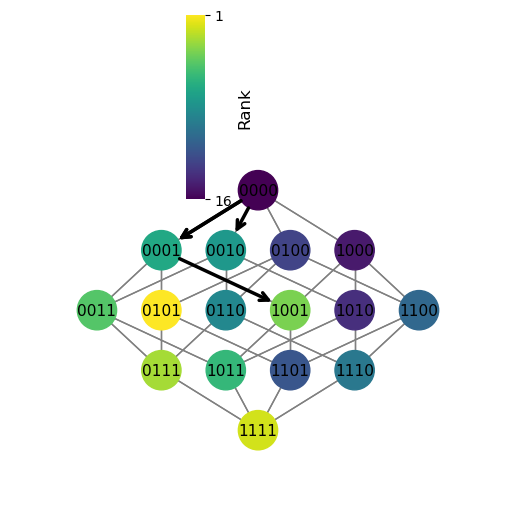

In [6]:
# for i in range(4):
#     traj_list = []
#     for sim_num in range(n_sims):
        
#         data = stats.get_sim_data(sim_num=sim_num,condition_num=i,exp=exp)
#         trajectory = [0]
#         for t in range(len(data[:,0])):
#             pop = data[t,:]
#             max_gen = np.argmax(pop)
#             if max_gen != trajectory[-1]:
#                 trajectory.append(max_gen)

#         traj_list.append(trajectory)

#     traj_list = list(set([tuple(traj) for traj in traj_list]))
#     plotter.plot_landscape(p,trajectory_list=traj_list,conc=20)

In [17]:
p.drugless_rates[[3,5,9]]

array([0.92760396, 0.88288613, 0.94995241])